In [3]:
from matplotlib import pyplot as plt
from upsetplot import generate_data, plot
import pandas as pd
import numpy as  np

In [4]:
df = pd.read_csv('atussum_0321.csv', header='infer')
filtered_df = pd.read_csv('atussum_0321.csv', header='infer', usecols=["TEAGE","TESEX","TRCHILDNUM"])

In [13]:
filtered_df.shape
filtered_df.head(3)

,TEAGE,TESEX,TRCHILDNUM,AgeFilter,SexFilter,ChildrenFilter
0,60,1,0,True,False,False
1,41,2,2,True,True,False
2,26,2,0,False,True,False


In [15]:
filtered_df['AgeFilter'] = filtered_df['TEAGE'] > 30
filtered_df['SexFilter'] = filtered_df['TESEX'] > 1
filtered_df['ChildrenFilter'] = filtered_df['TRCHILDNUM'] > 2
filtered_df.head(3)

,TEAGE,TESEX,TRCHILDNUM,AgeFilter,SexFilter,ChildrenFilter
0,60,1,0,True,False,False
1,41,2,2,True,True,False
2,26,2,0,False,True,False


In [17]:
booldf = filtered_df[['AgeFilter', 'SexFilter', 'ChildrenFilter']]
booldf.head(3)

,AgeFilter,SexFilter,ChildrenFilter
0,True,False,False
1,True,True,False
2,False,True,False


In [20]:
from upsetplot import from_indicators
from upsetplot import UpSet
movies_by_genre = from_indicators(booldf, data=df)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

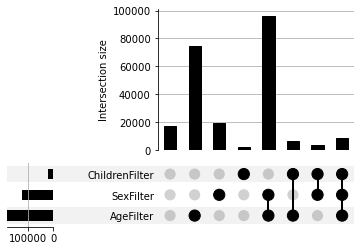

In [25]:
UpSet(movies_by_genre).plot()

In [29]:
import plotly.graph_objects as go
import plotly.offline as pyo

categories = ['AgeFilter', 'SexFilter', 'ChildrenFilter']
categories = [*categories, categories[0]]


restaurant_1 = booldf.sum().tolist()
restaurant_1 = [*restaurant_1, restaurant_1[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, fill='toself', name='Counts')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Multi dimensional count comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'

AgeFilter         186068
SexFilter         127664
ChildrenFilter     20835
dtype: int64